# SHAP

### Clasificación de eventos usando SHAP como seleccionador de características con los set de datos reducidos a 100000 eventos.

-------------------------------------------------------------------------------------------------------------------------------

Alex Toro, Raquel Pezoa

## Librerias necesarias-
-------------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
import shap
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [3]:
import xgboost as xgb

In [4]:
import winsound

In [5]:
shap.initjs()

## Lectura del set de datos reducido.

- El set original proviene de https://www.kaggle.com/competitions/higgs-boson/data.
- Separación de la variable Label de las demas variables.
-------------------------------------------------------------------------------------------------------------------------------

In [6]:
df = pd.read_csv("/Users/Alex/Downloads/Pre-procesado_Reducido-EventID.csv")

In [7]:
X = df.drop(labels=['Label'], axis=1)
Y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [8]:
X_train.to_csv('/Users/Alex/Downloads/Valores-X_TrainR.csv', index=False)

In [9]:
X_train = X_train.drop(labels=['EventId'], axis=1)
X_test = X_test.drop(labels=['EventId'], axis=1)

In [10]:
X_train.shape

(80000, 30)

In [11]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [10]:

classifier=XGBClassifier()

In [11]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [12]:
random_search.fit(X_train,y_train) # el de 5 iteraciones

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [13]:
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

In [14]:
print(random_search.best_estimator_) # 5 iteraciones

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [15]:
random_search.best_params_ # 5 iteraciones

{'min_child_weight': 5,
 'max_depth': 15,
 'learning_rate': 0.2,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

### Entrenamiento y testeo del set de datos con XGBoost.

- Se entrena con XGBClassifier antes de usar SHAP, ya que SHAP necesita con aterioridad un modelo entrenado.
-------------------------------------------------------------------------------------------------------------------------------

In [12]:
model = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=5,
              missing=None, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
model.get_params()
# nuevos hiperparametros

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.3,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0.1,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.2,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 15,
 'max_leaves': 0,
 'min_child_weight': 5,
 'missing': None,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': None,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'seed': None,
 'silent': True}

In [13]:
model.fit(X_train, y_train)

[18:42:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=5,
              missing=None, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [14]:
model.save_model("SHAP-XGBoostClassifier-EventId.model")

### SHAP seleccionado características.

In [15]:
# Fits the explainer
explainer = shap.TreeExplainer(model = model)
# Calculates the SHAP values - It takes some time

In [16]:
# Evaluate SHAP values
shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


### Waterfall plot

- Esta gráfica muestra cómo las características contribuyen a impulsar la predicción del clasificador desde el valor base (la predicción promedio del modelo sobre el conjunto de datos de entrenamiento) hasta la salida del modelo, de una muestra de datos específica.
- Las características que empujan la predicción más alta se muestran en rojo, las que empujan la predicción más baja están en azul.
-------------------------------------------------------------------------------------------------------------------------------

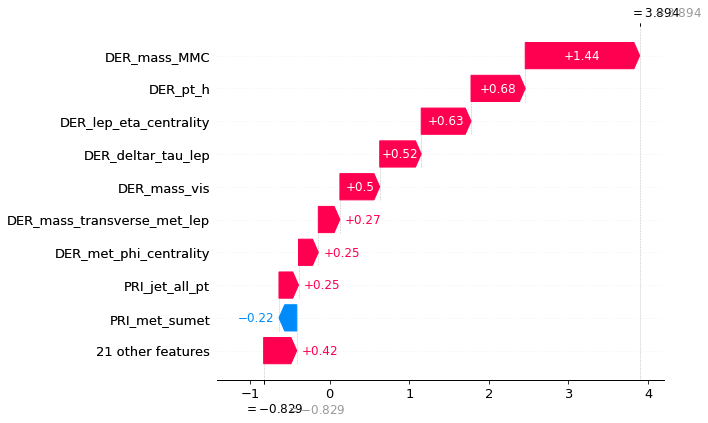

In [17]:
i=4
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, 
                                       shap_values[i],
                                       feature_names = X_train.columns, 
                                       show = True,
                                      max_display=10)
# el numero es lo que contribuye en el dato en la posicion 4 (un evento)

### Summary Plots
- Ranking de las mejore 20 características
-------------------------------------------------------------------------------------------------------------------------------

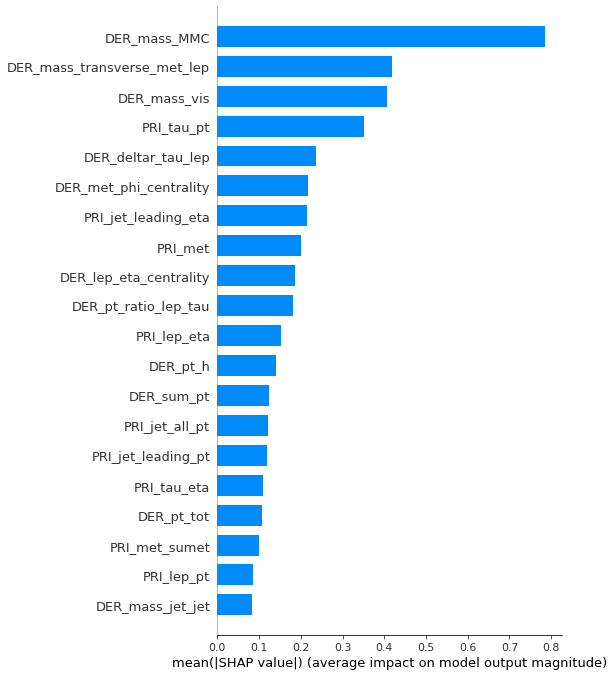

In [18]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [19]:
X_test

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
3582,-999.000,51.525,64.653,58.637,-999.000,-999.000,-999.000,1.797,58.637,89.719,...,2.340,221.042,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
60498,153.541,13.850,83.206,81.976,4.211,719.978,-3.739,2.632,29.361,249.653,...,2.108,370.166,2,102.704,-1.272,-1.920,72.803,2.939,0.699,175.507
53227,138.446,1.833,62.411,140.682,0.560,170.804,0.552,2.290,43.660,348.000,...,2.223,424.059,3,172.656,-0.514,-0.716,69.112,-1.074,-2.313,282.655
21333,137.621,88.006,73.570,1.436,-999.000,-999.000,-999.000,3.040,1.436,81.058,...,-2.323,102.216,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3885,137.341,16.591,103.245,346.650,1.493,189.269,0.535,1.212,177.422,625.424,...,2.090,736.536,3,112.596,1.791,-1.492,109.589,0.298,-1.855,357.919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60116,-999.000,74.312,49.597,34.237,-999.000,-999.000,-999.000,1.593,2.563,100.839,...,3.103,147.340,1,31.825,-0.521,-0.624,-999.000,-999.000,-999.000,31.825
2415,129.729,59.415,36.534,239.330,2.328,223.783,-1.351,1.135,53.748,298.555,...,0.471,308.579,3,156.969,1.231,-2.784,37.134,-1.097,-2.377,227.006
43763,124.421,61.185,61.912,114.465,1.478,132.847,0.345,1.927,23.801,218.586,...,-1.936,270.194,2,70.661,-0.205,1.182,60.564,-1.683,-0.056,131.225
71345,74.761,15.304,39.035,122.816,-999.000,-999.000,-999.000,1.180,28.062,172.760,...,2.430,201.181,1,102.368,-2.306,-1.037,-999.000,-999.000,-999.000,102.368


In [20]:
shap_values

array([[-8.0016756e-01,  3.6272649e-03, -5.8537640e-05, ...,
         2.0019617e-02,  1.8028660e-02, -4.9981318e-02],
       [ 1.0094316e+00,  3.5742235e-01,  3.7790209e-01, ...,
         7.7972688e-02,  4.7023829e-02,  1.5257981e-01],
       [ 1.4875022e+00,  4.6042955e-01,  2.7193127e-02, ...,
         3.9251661e-03,  2.7871896e-02,  1.8339518e-01],
       ...,
       [ 9.2198735e-01, -3.2092986e-01, -7.0628583e-02, ...,
        -4.5441907e-02,  3.3100937e-02,  2.7057236e-01],
       [-1.7879181e+00,  1.7528585e-01, -7.5028974e-01, ...,
         1.5211729e-03, -3.5245273e-02,  6.5278053e-02],
       [-1.3051468e-01, -7.5098294e-01, -2.2990271e-02, ...,
        -5.1338132e-03,  2.3545972e-03,  9.9505857e-02]], dtype=float32)

### Obteniendo la media de los valores absolutos de SHAP (|SHAP value|).
-------------------------------------------------------------------------------------------------------------------------------

In [21]:
meanL = []
for valus in range(0,len(shap_values)):
    for singularidad in range(0,len(shap_values[valus])):
        if valus==0:
            meanL.append(abs(shap_values[valus][singularidad]))
        else:
            meanL[singularidad]=meanL[singularidad]+abs(shap_values[valus][singularidad])

### Convertir los datos a  una lista de duplas.

- Se convierte la media de los valores absolutos de SHAP junto a las columnas del dataframe en una lista de duplas.
- Se realizan las duplas para así poder reordenar las variables de la más relevante a la menos relevante.
- Se Reordena la duplas de mayor a menor.
- Se separan las duplas en listas separadas y transformar las 20 primeras en arreglos de numpy.
-------------------------------------------------------------------------------------------------------------------------------

In [22]:
meanL=list(map(lambda x: x / len(shap_values), meanL))
l=[]
for feature in zip(meanL,X_train.columns):
    l.append(feature)
    print(feature)

(0.7856869140625, 'DER_mass_MMC')
(0.418486669921875, 'DER_mass_transverse_met_lep')
(0.4071599609375, 'DER_mass_vis')
(0.14145767822265626, 'DER_pt_h')
(0.06396580200195312, 'DER_deltaeta_jet_jet')
(0.08244983520507812, 'DER_mass_jet_jet')
(0.066743310546875, 'DER_prodeta_jet_jet')
(0.2352564208984375, 'DER_deltar_tau_lep')
(0.1077657470703125, 'DER_pt_tot')
(0.1238309326171875, 'DER_sum_pt')
(0.1813708740234375, 'DER_pt_ratio_lep_tau')
(0.217916796875, 'DER_met_phi_centrality')
(0.18709271240234376, 'DER_lep_eta_centrality')
(0.35090068359375, 'PRI_tau_pt')
(0.1089707763671875, 'PRI_tau_eta')
(0.07331231079101562, 'PRI_tau_phi')
(0.08499188232421875, 'PRI_lep_pt')
(0.15213663330078125, 'PRI_lep_eta')
(0.06937512817382813, 'PRI_lep_phi')
(0.19979140625, 'PRI_met')
(0.06721130981445313, 'PRI_met_phi')
(0.09953596801757812, 'PRI_met_sumet')
(0.03373025817871094, 'PRI_jet_num')
(0.1197289794921875, 'PRI_jet_leading_pt')
(0.2143789794921875, 'PRI_jet_leading_eta')
(0.04233533630371094, 'P

In [23]:
l.sort(reverse=True)
l

[(0.7856869140625, 'DER_mass_MMC'),
 (0.418486669921875, 'DER_mass_transverse_met_lep'),
 (0.4071599609375, 'DER_mass_vis'),
 (0.35090068359375, 'PRI_tau_pt'),
 (0.2352564208984375, 'DER_deltar_tau_lep'),
 (0.217916796875, 'DER_met_phi_centrality'),
 (0.2143789794921875, 'PRI_jet_leading_eta'),
 (0.19979140625, 'PRI_met'),
 (0.18709271240234376, 'DER_lep_eta_centrality'),
 (0.1813708740234375, 'DER_pt_ratio_lep_tau'),
 (0.15213663330078125, 'PRI_lep_eta'),
 (0.14145767822265626, 'DER_pt_h'),
 (0.1238309326171875, 'DER_sum_pt'),
 (0.12023797607421875, 'PRI_jet_all_pt'),
 (0.1197289794921875, 'PRI_jet_leading_pt'),
 (0.1089707763671875, 'PRI_tau_eta'),
 (0.1077657470703125, 'DER_pt_tot'),
 (0.09953596801757812, 'PRI_met_sumet'),
 (0.08499188232421875, 'PRI_lep_pt'),
 (0.08244983520507812, 'DER_mass_jet_jet'),
 (0.07331231079101562, 'PRI_tau_phi'),
 (0.06937512817382813, 'PRI_lep_phi'),
 (0.06721130981445313, 'PRI_met_phi'),
 (0.066743310546875, 'DER_prodeta_jet_jet'),
 (0.063965802001953

In [24]:
l_v = ['EventId']
for importance in range(len(l)):
    for var in range(len(l[importance])):
        if(var == 1):
            l_v.append(l[importance][var])
            

In [25]:
x = np.array(l_v[0:21])
x

array(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'PRI_tau_pt', 'DER_deltar_tau_lep',
       'DER_met_phi_centrality', 'PRI_jet_leading_eta', 'PRI_met',
       'DER_lep_eta_centrality', 'DER_pt_ratio_lep_tau', 'PRI_lep_eta',
       'DER_pt_h', 'DER_sum_pt', 'PRI_jet_all_pt', 'PRI_jet_leading_pt',
       'PRI_tau_eta', 'DER_pt_tot', 'PRI_met_sumet', 'PRI_lep_pt',
       'DER_mass_jet_jet'], dtype='<U27')

In [26]:
# Force_plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[102,:], X_test.iloc[102,:], link="logit")

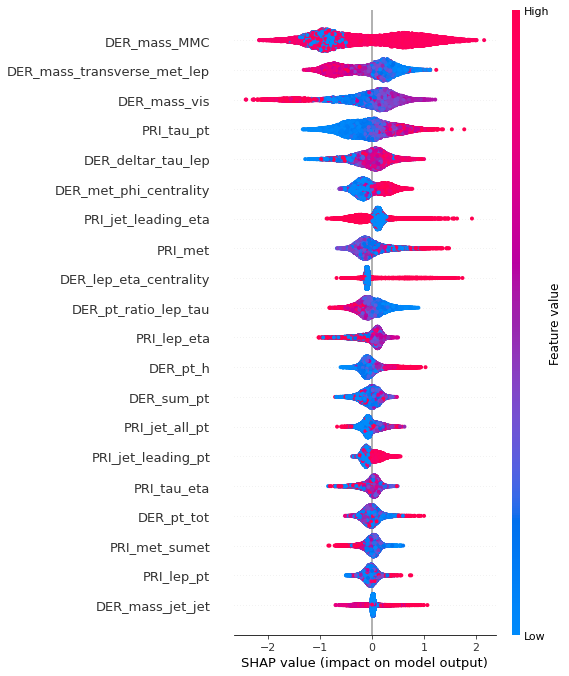

In [27]:
shap.summary_plot(shap_values, X_test)

In [28]:
X_BestFeature = X[x]
X_BestFeature

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,PRI_tau_pt,DER_deltar_tau_lep,DER_met_phi_centrality,PRI_jet_leading_eta,PRI_met,DER_lep_eta_centrality,...,PRI_lep_eta,DER_pt_h,DER_sum_pt,PRI_jet_all_pt,PRI_jet_leading_pt,PRI_tau_eta,DER_pt_tot,PRI_met_sumet,PRI_lep_pt,DER_mass_jet_jet
0,238682,85.123,5.111,45.454,28.827,1.288,1.335,-0.903,73.597,-999.000,...,0.354,139.856,212.788,145.787,145.787,-0.900,6.593,327.124,38.174,-999.000
1,371291,70.751,16.532,47.178,35.467,1.221,0.215,-2.876,38.748,0.545,...,1.079,107.916,209.956,137.049,58.119,2.286,49.749,326.261,37.440,442.881
2,589566,-999.000,79.211,77.286,58.913,1.879,-1.358,-999.000,65.606,-999.000,...,-1.316,0.998,92.329,0.000,-999.000,-0.405,0.998,102.229,33.416,-999.000
3,477268,74.959,58.796,58.484,29.469,2.628,-1.359,-999.000,33.185,-999.000,...,-1.125,24.962,57.390,0.000,-999.000,-0.422,24.962,84.495,27.921,-999.000
4,423429,-999.000,82.701,109.640,34.761,2.674,-1.326,-999.000,62.011,-999.000,...,2.123,2.044,62.347,0.000,-999.000,-0.547,2.044,110.727,27.586,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,276894,95.075,9.736,62.654,72.089,1.078,0.659,-0.962,56.776,-999.000,...,0.750,165.282,271.045,154.838,154.838,-0.216,24.675,338.910,44.118,-999.000
99996,672671,108.208,20.509,70.580,24.802,2.551,1.393,-0.341,23.523,0.541,...,-0.037,56.085,176.428,117.155,62.533,1.520,4.378,221.148,34.470,246.437
99997,509655,77.503,20.791,44.842,20.812,1.628,1.382,-2.383,51.494,-999.000,...,-0.680,99.933,156.158,97.379,97.379,0.344,2.970,162.416,37.967,-999.000
99998,379185,96.531,12.773,60.703,83.062,1.031,1.413,1.188,68.280,0.826,...,0.868,187.917,393.666,270.979,126.766,-0.050,71.559,428.033,39.626,169.441


### Entrenamiento, testeo y optimizacion de parametros de DMatrix de XGBoost con las variables entregadas por SHAP.
-------------------------------------------------------------------------------------------------------------------------------

In [29]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_BestFeature, Y, test_size=0.2, random_state=0)

In [30]:
X_train2.to_csv('/Users/Alex/Downloads/Valores-X_Train2R.csv', index=False)

In [31]:
X_train2 = X_train2.drop(labels=['EventId'], axis=1)
X_test2 = X_test2.drop(labels=['EventId'], axis=1)

In [32]:
dtrain = xgb.DMatrix(X_train2, label=y_train2)
dtest = xgb.DMatrix(X_test2, label=y_test2) 

In [33]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}
params['eval_metric'] = "mae"
params['base_score'] = np.mean(y_train)
num_boost_round = 999

In [34]:
modelo = xgb.train( 
    params, 
    dtrain, 
    num_boost_round=num_boost_round, 
    evals=[(dtest, "Test")], 
    early_stopping_rounds=10 
)

[18:43:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.39311
[1]	Test-mae:0.35309
[2]	Test-mae:0.32345
[3]	Test-mae:0.30144
[4]	Test-mae:0.28483
[5]	Test-mae:0.27289
[6]	Test-mae:0.26550
[7]	Test-mae:0.25857
[8]	Test-mae:0.25284
[9]	Test-mae:0.24944
[10]	Test-mae:0.24691
[11]	Test-mae:0.24487
[12]	Test-mae:0.24387
[13]	Test-mae:0.24227
[14]	Test-mae:0.24068
[15]	Test-mae:0.24051
[16]	Test-mae:0.23910
[17]	Test-mae:0.23906
[18]	Test-mae:0.23865
[19]	Test-mae:0.23843
[20]	Test-mae:0.23770
[21]	Test-mae:0.23754
[22]	Test-mae:0.23761
[23]	Test-mae:0.23743
[24]	Test-mae:0.23738
[25]	Test-mae:0.23721
[26]	Test-mae:0.23730
[27]	Test-mae:0.23732
[28]	Test-mae:0.23733
[29]	Test-mae:0.23727
[30]	Test-mae:0.23694
[31]	Test-mae:0.23649
[32]	Test-mae:0.23663
[33]	Test-mae:0.23660
[34]	Test-mae:0.23662
[35]	Test-mae:0.23656
[36]	Test-mae:0.23655
[37]	Test-mae:0.236

In [35]:
print("Best MAE: {:.2f} with {} rounds".format(
                 modelo.best_score,
                 modelo.best_iteration+1))

Best MAE: 0.24 with 52 rounds


In [36]:
cv_results = xgb.cv( 
    params, 
    dtrain, 
    num_boost_round=num_boost_round, 
    seed=42, 
    nfold=5, 
    metrics={'mae'}, 
    early_stopping_rounds=10 
)
cv_results

[18:43:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.392880,0.000398,0.393978,0.000922
1,0.352048,0.000395,0.354155,0.000989
2,0.322029,0.000398,0.324989,0.000964
3,0.299496,0.000497,0.303157,0.001203
4,0.282544,0.000692,0.286977,0.000756
5,0.269460,0.000320,0.274739,0.000935
6,0.260131,0.000538,0.265943,0.000952
7,0.252630,0.000699,0.259007,0.001429
8,0.247081,0.000292,0.253960,0.001292
9,0.243219,0.000359,0.250694,0.001360


In [37]:
cv_results['test-mae-mean'].min()

0.23723787963643345

In [38]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [39]:
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

CV with max_depth=9, min_child_weight=5
[18:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.23158254756466076 for 23 rounds
CV with max_depth=9, min_child_weigh

[18:46:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.23012020993647733 for 17 rounds
Best params: 11, 5, MAE: 0.2293734682901955


In [40]:
params['max_depth'] = 11
params['min_child_weight'] = 5

In [41]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [42]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

CV with subsample=1.0, colsample=1.0
[18:46:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.2293734682901955 for 19 rounds
CV with subsample=1.0, colsample=0.9
[18

[18:48:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.2317046342535905 for 15 rounds
CV with subsample=0.8, colsample=0.9
[18:49:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:05] WARNING: C:/Users/Administrat

In [43]:
params['subsample'] = 1.
params['colsample_bytree'] = 1.

In [44]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['mae'],
            early_stopping_rounds=10
          )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

CV with eta=0.3
[18:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.2293734682901955 for 19 rounds

CV with eta=0.2
[18:51:02] WARNING: C:/Users/Administrator/w

In [45]:
params['eta'] = .05

In [46]:
params

{'max_depth': 11,
 'min_child_weight': 5,
 'eta': 0.05,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'reg:linear',
 'eval_metric': 'mae',
 'base_score': 0.3407875}

In [47]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[19:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.43744
[1]	Test-mae:0.42735
[2]	Test-mae:0.41770
[3]	Test-mae:0.40859
[4]	Test-mae:0.40000
[5]	Test-mae:0.39177
[6]	Test-mae:0.38400
[7]	Test-mae:0.37650
[8]	Test-mae:0.36937
[9]	Test-mae:0.36261
[10]	Test-mae:0.35621
[11]	Test-mae:0.35006
[12]	Test-mae:0.34412
[13]	Test-mae:0.33859
[14]	Test-mae:0.33321
[15]	Test-mae:0.32820
[16]	Test-mae:0.32332
[17]	Test-mae:0.31866
[18]	Test-mae:0.31429
[19]	Test-mae:0.31007
[20]	Test-mae:0.30609
[21]	Test-mae:0.30224
[22]	Test-mae:0.29858
[23]	Test-mae:0.29508
[24]	Test-mae:0.29168
[25]	Test-mae:0.28845
[26]	Test-mae:0.28548
[27]	Test-mae:0.28254
[28]	Test-mae:0.27977
[29]	Test-mae:0.27724
[30]	Test-mae:0.27472
[31]	Test-mae:0.27226
[32]	Test-mae:0.26998
[33]	Test-mae:0.26785
[34]	Test-mae:0.26583
[35]	Test-mae:0.26388
[36]	Test-mae:0.26201
[37]	Test-mae:0.260

[354]	Test-mae:0.21995
[355]	Test-mae:0.21996
[356]	Test-mae:0.21994
[357]	Test-mae:0.21992
[358]	Test-mae:0.21991
[359]	Test-mae:0.21992
[360]	Test-mae:0.21991
[361]	Test-mae:0.21992
[362]	Test-mae:0.21991
[363]	Test-mae:0.21989
[364]	Test-mae:0.21987
[365]	Test-mae:0.21986
[366]	Test-mae:0.21985
[367]	Test-mae:0.21984
[368]	Test-mae:0.21984
[369]	Test-mae:0.21984
[370]	Test-mae:0.21984
[371]	Test-mae:0.21984
[372]	Test-mae:0.21983
[373]	Test-mae:0.21983
[374]	Test-mae:0.21984
[375]	Test-mae:0.21984
[376]	Test-mae:0.21984
[377]	Test-mae:0.21984
[378]	Test-mae:0.21982
[379]	Test-mae:0.21982
[380]	Test-mae:0.21982
[381]	Test-mae:0.21982
[382]	Test-mae:0.21980
[383]	Test-mae:0.21979
[384]	Test-mae:0.21979
[385]	Test-mae:0.21979
[386]	Test-mae:0.21980
[387]	Test-mae:0.21980
[388]	Test-mae:0.21979
[389]	Test-mae:0.21980
[390]	Test-mae:0.21980
[391]	Test-mae:0.21980
[392]	Test-mae:0.21979
[393]	Test-mae:0.21977
[394]	Test-mae:0.21977
[395]	Test-mae:0.21975
[396]	Test-mae:0.21975
[397]	Test-

In [48]:
um_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[19:21:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.43744
[1]	Test-mae:0.42735
[2]	Test-mae:0.41770
[3]	Test-mae:0.40859
[4]	Test-mae:0.40000
[5]	Test-mae:0.39177
[6]	Test-mae:0.38400
[7]	Test-mae:0.37650
[8]	Test-mae:0.36937
[9]	Test-mae:0.36261
[10]	Test-mae:0.35621
[11]	Test-mae:0.35006
[12]	Test-mae:0.34412
[13]	Test-mae:0.33859
[14]	Test-mae:0.33321
[15]	Test-mae:0.32820
[16]	Test-mae:0.32332
[17]	Test-mae:0.31866
[18]	Test-mae:0.31429
[19]	Test-mae:0.31007
[20]	Test-mae:0.30609
[21]	Test-mae:0.30224
[22]	Test-mae:0.29858
[23]	Test-mae:0.29508
[24]	Test-mae:0.29168
[25]	Test-mae:0.28845
[26]	Test-mae:0.28548
[27]	Test-mae:0.28254
[28]	Test-mae:0.27977
[29]	Test-mae:0.27724
[30]	Test-mae:0.27472
[31]	Test-mae:0.27226
[32]	Test-mae:0.26998
[33]	Test-mae:0.26785
[34]	Test-mae:0.26583
[35]	Test-mae:0.26388
[36]	Test-mae:0.26201
[37]	Test-mae:0.260

[354]	Test-mae:0.21995
[355]	Test-mae:0.21996
[356]	Test-mae:0.21994
[357]	Test-mae:0.21992
[358]	Test-mae:0.21991
[359]	Test-mae:0.21992
[360]	Test-mae:0.21991
[361]	Test-mae:0.21992
[362]	Test-mae:0.21991
[363]	Test-mae:0.21989
[364]	Test-mae:0.21987
[365]	Test-mae:0.21986
[366]	Test-mae:0.21985
[367]	Test-mae:0.21984
[368]	Test-mae:0.21984
[369]	Test-mae:0.21984
[370]	Test-mae:0.21984
[371]	Test-mae:0.21984
[372]	Test-mae:0.21983
[373]	Test-mae:0.21983
[374]	Test-mae:0.21984
[375]	Test-mae:0.21984
[376]	Test-mae:0.21984
[377]	Test-mae:0.21984
[378]	Test-mae:0.21982
[379]	Test-mae:0.21982
[380]	Test-mae:0.21982
[381]	Test-mae:0.21982
[382]	Test-mae:0.21980
[383]	Test-mae:0.21979
[384]	Test-mae:0.21979
[385]	Test-mae:0.21979
[386]	Test-mae:0.21980
[387]	Test-mae:0.21980
[388]	Test-mae:0.21979
[389]	Test-mae:0.21980
[390]	Test-mae:0.21980
[391]	Test-mae:0.21980
[392]	Test-mae:0.21979
[393]	Test-mae:0.21977
[394]	Test-mae:0.21977
[395]	Test-mae:0.21975
[396]	Test-mae:0.21975
[397]	Test-

[711]	Test-mae:0.21838
[712]	Test-mae:0.21837
[713]	Test-mae:0.21836
[714]	Test-mae:0.21835
[715]	Test-mae:0.21835
[716]	Test-mae:0.21835
[717]	Test-mae:0.21835
[718]	Test-mae:0.21836
[719]	Test-mae:0.21835
[720]	Test-mae:0.21835
[721]	Test-mae:0.21835
[722]	Test-mae:0.21835
[723]	Test-mae:0.21834
[724]	Test-mae:0.21833
[725]	Test-mae:0.21832
[726]	Test-mae:0.21833
[727]	Test-mae:0.21832
[728]	Test-mae:0.21831
[729]	Test-mae:0.21828
[730]	Test-mae:0.21828
[731]	Test-mae:0.21828
[732]	Test-mae:0.21828
[733]	Test-mae:0.21826
[734]	Test-mae:0.21826
[735]	Test-mae:0.21826
[736]	Test-mae:0.21825
[737]	Test-mae:0.21826
[738]	Test-mae:0.21824
[739]	Test-mae:0.21823
[740]	Test-mae:0.21823
[741]	Test-mae:0.21823
[742]	Test-mae:0.21821
[743]	Test-mae:0.21820
[744]	Test-mae:0.21820
[745]	Test-mae:0.21820
[746]	Test-mae:0.21820
[747]	Test-mae:0.21820
[748]	Test-mae:0.21819
[749]	Test-mae:0.21818
[750]	Test-mae:0.21818
[751]	Test-mae:0.21818
[752]	Test-mae:0.21818
[753]	Test-mae:0.21818
[754]	Test-

In [49]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(best_model.predict(dtest), y_test2)

0.21756785542475426

### Guardado del modelo y predicciones.
-------------------------------------------------------------------------------------------------------------------------------

In [50]:
best_model.save_model("SHAP-20%-EventId.model")

In [51]:
loaded_model = xgb.Booster()
loaded_model.load_model("SHAP-20%-EventId.model")
# And use it for predictions.

[19:23:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [52]:
Prediccion = loaded_model.predict(dtest)

In [53]:
Prediccion.min()

-0.19427437

In [54]:
Prediccion.max()

1.1876857

In [55]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, classification_report, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay

In [56]:
testing_list =[]
for i in  np.linspace(0.1,0.9,9):
    d = {}
    y_p = Prediccion >= i
    print("Threshold:",i)
    cm = confusion_matrix(y_test2,y_p)
    d["th"] = i
    d["F1"] = np.round(f1_score(y_test2,y_p),2)
    d["Prec"] = np.round(precision_score(y_test2,y_p),2)
    d["Rec"] = np.round(recall_score(y_test2,y_p),2)
    d["Acc"] = np.round(accuracy_score(y_test2,y_p),2)
    d["RocAuc"] = np.round(roc_auc_score(y_test2,y_p),2)
    testing_list.append(d)

Threshold: 0.1
Threshold: 0.2
Threshold: 0.30000000000000004
Threshold: 0.4
Threshold: 0.5
Threshold: 0.6
Threshold: 0.7000000000000001
Threshold: 0.8
Threshold: 0.9


# Metricas para cada umbral.
- th: umbral
-------------------------------------------------------------------------------------------------------------------------------

In [57]:
testing_metrics_pd = pd.DataFrame(testing_list)
testing_metrics_pd

,th,F1,Prec,Rec,Acc,RocAuc
0,0.1,0.68,0.52,0.96,0.69,0.76
1,0.2,0.74,0.62,0.92,0.78,0.82
2,0.3,0.77,0.69,0.87,0.82,0.83
3,0.4,0.78,0.75,0.81,0.84,0.83
4,0.5,0.77,0.80,0.75,0.85,0.83
5,0.6,0.75,0.84,0.68,0.85,0.81
6,0.7,0.70,0.88,0.58,0.83,0.77
7,0.8,0.62,0.92,0.47,0.81,0.72
8,0.9,0.47,0.95,0.31,0.76,0.65


In [58]:
print(testing_metrics_pd.to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
 th &   F1 &  Prec &  Rec &  Acc &  RocAuc \\
\midrule
0.1 & 0.68 &  0.52 & 0.96 & 0.69 &    0.76 \\
0.2 & 0.74 &  0.62 & 0.92 & 0.78 &    0.82 \\
0.3 & 0.77 &  0.69 & 0.87 & 0.82 &    0.83 \\
0.4 & 0.78 &  0.75 & 0.81 & 0.84 &    0.83 \\
0.5 & 0.77 &  0.80 & 0.75 & 0.85 &    0.83 \\
0.6 & 0.75 &  0.84 & 0.68 & 0.85 &    0.81 \\
0.7 & 0.70 &  0.88 & 0.58 & 0.83 &    0.77 \\
0.8 & 0.62 &  0.92 & 0.47 & 0.81 &    0.72 \\
0.9 & 0.47 &  0.95 & 0.31 & 0.76 &    0.65 \\
\bottomrule
\end{tabular}



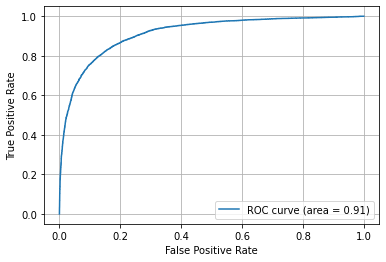

In [59]:
fpr, tpr, ths = roc_curve(y_test2,  Prediccion)
auc_ = auc(fpr, tpr)
plt.plot(fpr,tpr, label='ROC curve (area = %.2f)' %auc_)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.grid()
plt.show()

In [60]:
for i in  np.linspace(0.1,0.9,9):
    print(i)
    y_p = Prediccion >= i
    print(classification_report(y_test2, y_p))
    f1 = f1_score(y_test2, y_p)
    prec = precision_score(y_test2, y_p)
    rec = recall_score(y_test2, y_p)
    acc = accuracy_score(y_test2, y_p)
    cm=confusion_matrix(y_test2, y_p)
    print("Matriz de confusión: ")
    print(cm)
    print("----------------------------------------------------------")
    print("F1: %.2f" %f1 , " -- prec: %.2f" %prec, " -- recall: %.2f" %rec, " -- acc: %.2f" %acc)
    print("----------------------------------------------------------")

0.1
              precision    recall  f1-score   support

           0       0.97      0.56      0.71     13263
           1       0.52      0.96      0.68      6737

    accuracy                           0.69     20000
   macro avg       0.75      0.76      0.69     20000
weighted avg       0.82      0.69      0.70     20000

Matriz de confusión: 
[[7386 5877]
 [ 255 6482]]
----------------------------------------------------------
F1: 0.68  -- prec: 0.52  -- recall: 0.96  -- acc: 0.69
----------------------------------------------------------
0.2
              precision    recall  f1-score   support

           0       0.95      0.71      0.81     13263
           1       0.62      0.92      0.74      6737

    accuracy                           0.78     20000
   macro avg       0.78      0.82      0.78     20000
weighted avg       0.84      0.78      0.79     20000

Matriz de confusión: 
[[9414 3849]
 [ 520 6217]]
----------------------------------------------------------
F1: 0.74

In [61]:
umbral = 0.4

In [62]:
maskSignal=Prediccion>umbral

In [63]:
predicBin=[]
for i in maskSignal:
    if(i==True):
        predicBin.append(1)
    else:
        predicBin.append(0)

In [64]:
npPredict=np.array(predicBin)

In [65]:
cm=confusion_matrix(y_test2, npPredict)
cm

array([[11415,  1848],
       [ 1288,  5449]], dtype=int64)

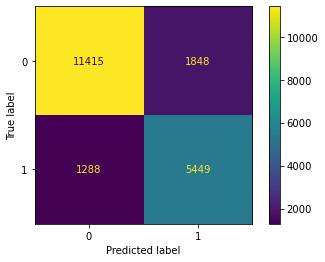

In [66]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [67]:
f1= f1_score(y_test2, npPredict)
f1

0.7765426820578595

In [68]:
prec=precision_score(y_test2, npPredict)
prec

0.7467452377689462

In [69]:
rec=recall_score(y_test2, npPredict)
rec

0.8088169808520113

In [70]:
accu=accuracy_score(y_test2, npPredict)
accu

0.8432

In [71]:
print(classification_report(y_test2, npPredict))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88     13263
           1       0.75      0.81      0.78      6737

    accuracy                           0.84     20000
   macro avg       0.82      0.83      0.83     20000
weighted avg       0.85      0.84      0.84     20000



In [72]:
print("F1: %.2f" %f1 , " -- prec: %.2f" %prec, " -- recall: %.2f" %rec, " -- acc: %.2f" %acc)

F1: 0.78  -- prec: 0.75  -- recall: 0.81  -- acc: 0.76
